<a href="https://colab.research.google.com/github/Ramya-korupolu/Machine-Learning/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Salary Prediction Using Simple Linear Regression

---


## Problem
### To model linear relationship between salary and experience,predicting salary(dependent variable) using experience(independent variable).To build a simple linear regression model by EDA and do necessary transformations.



*   Importing the libraries.
*   Importing the dataset



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

data = pd.read_csv("/content/Sheet1.csv")
X = data['YearsExperience']
y = data['Salary']



# Analyzing The Data


Observation :


---


*   1150 rows and 5 columns
*   No Null values
*   Columns names:'Company Name', 'Job Title', 'YearsExperience', 'Location', 'Salary'











In [ ]:
data

,Company Name,Job Title,YearsExperience,Location,Salary
0,Mu Sigma,Data Scientist,1.1,Bangalore,648573
1,IBM,Data Scientist,1.3,Bangalore,1191950
2,Tata Consultancy Services,Data Scientist,1.5,Bangalore,836874
3,Impact Analytics,Data Scientist,2.0,Bangalore,669578
4,Accenture,Data Scientist,2.2,Bangalore,944110
...,...,...,...,...,...
1145,advids.co,Data Scientist,1.0,Pune,80495
1146,Xcaliber Infotech,Data Scientist,1.0,Pune,642322
1147,MIT World Peace University,Data Scientist,1.0,Pune,10000
1148,iNeuron,Data Scientist,1.0,Pune,20280


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company Name     1150 non-null   object 
 1   Job Title        1150 non-null   object 
 2   YearsExperience  1150 non-null   float64
 3   Location         1150 non-null   object 
 4   Salary           1150 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 45.0+ KB


In [ ]:
data.describe()

,YearsExperience,Salary
count,1150.000000,1.150000e+03
mean,1.864696,9.875562e+05
std,1.963737,9.348179e+05
min,1.000000,1.000000e+02
25%,1.000000,3.151865e+05
50%,1.000000,8.316180e+05
75%,2.000000,1.431887e+06
max,30.000000,9.568943e+06


In [ ]:
data.columns

Index(['Company Name', 'Job Title', 'YearsExperience', 'Location', 'Salary'], dtype='object')

# EDA and Data Visualization


1.   Displots for Salary and YearsExperience.
2.   The Relationship Between YearsExperience and Salary of an employee is shown by using the plots:
 *   Jointplot
 *   Pairplot
 *   Subplot
 *   Heatmap





/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



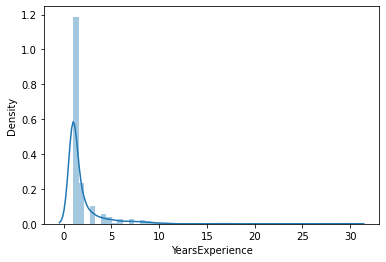

In [ ]:
sb.distplot(data['YearsExperience'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



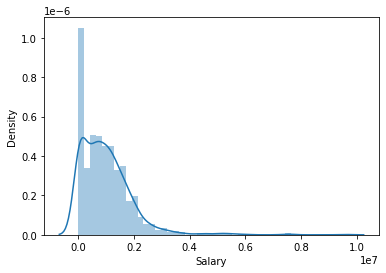

In [ ]:
sb.distplot(data['Salary'])

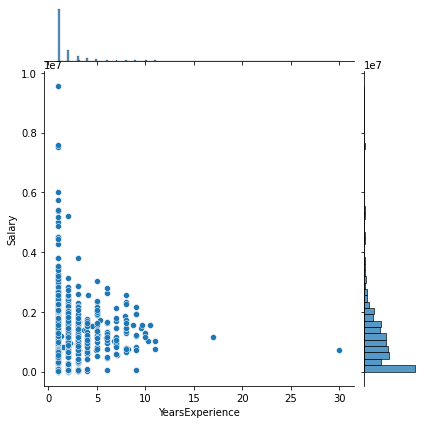

In [ ]:
sb.jointplot(x='YearsExperience',y='Salary',data=data)

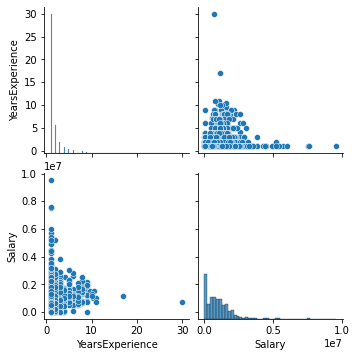

In [ ]:
sb.pairplot(data)

Text(0.5, 1.0, 'YearsExperience vs Salary')

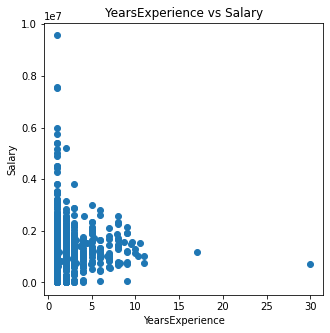

In [ ]:
fig,ax=plt.subplots(figsize=(5,5))
plt.scatter(data['YearsExperience'],data['Salary'])
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("YearsExperience vs Salary")

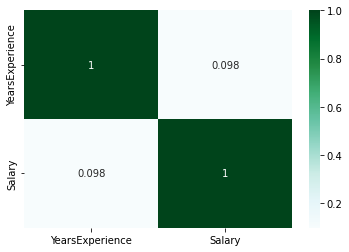

In [ ]:
sb.heatmap(data.corr(),cmap="BuGn",annot=True)
plt.show()

# Linear Regression

In [ ]:
X

0       1.1
1       1.3
2       1.5
3       2.0
4       2.2
       ... 
1145    1.0
1146    1.0
1147    1.0
1148    1.0
1149    1.0
Name: YearsExperience, Length: 1150, dtype: float64

In [ ]:
y

0        648573
1       1191950
2        836874
3        669578
4        944110
         ...   
1145      80495
1146     642322
1147      10000
1148      20280
1149     541685
Name: Salary, Length: 1150, dtype: int64

*   Splitting the dataset into the Training set and Test set.
*   Performs data transformation on our training set and test set.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model 


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
X_train = np.array(X_train).reshape((len(X_train),1))
y_train = np.array(y_train).reshape((len(y_train),1))
X_test = np.array(X_test).reshape(len(X_test), 1)
y_test = np.array(y_test).reshape(len(y_test), 1)


Predicting Salary on Linear Model

*   Predicting the Test set results.
*   Visualising the Training set results



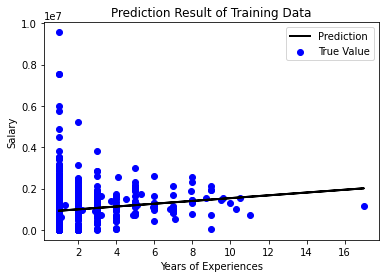

In [ ]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
plt.figure()
plt.scatter(X_train, y_train, color='blue', label="True Value")
plt.plot(X_train, y_train_pred, color='black', linewidth=2, label="Prediction")
plt.xlabel("Years of Experiences")
plt.ylabel("Salary")
plt.title('Prediction Result of Training Data')
plt.legend()
plt.show()



*   Visualising the Test set results



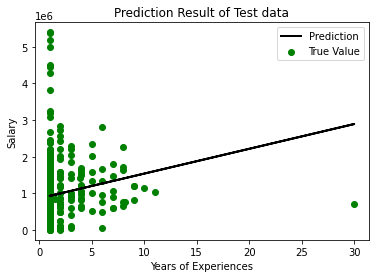

In [ ]:
y_test_pred = model.predict(X_test)

plt.figure()
plt.scatter(X_test, y_test, color='green', label='True Value')
plt.plot(X_test, y_test_pred, color='black', linewidth=2, label='Prediction')
plt.xlabel("Years of Experiences")
plt.ylabel("Salary")
plt.title('Prediction Result of Test data')
plt.legend()
plt.show()

# Model Evaluation
We will use three types of quantitative metrics:

*   Mean Square Error
*   Explained Variance Score
*   R2 Score
WE use the Scikit-learn Metrics functionalities



In [ ]:
import sklearn.metrics as sm
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2))
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean squared error = 843817634444.38
Explain variance score = -0.01
R2 score = -0.01


# Conclusion

---
We build a simple linear model to predict salary based on years of working experience. Based on our linear model, we can conclude that our salary is grown with our years of working experience and there is a linear relationship between them. We can use our linear model to predict the salary by giving input of years of experience.
